# Análisis de sentimientos con opiniones de productos - NPS

La valoración numérica que da un usuario da a un producto es el indicador de si la valoración de texto es positiva, negativa o neutra.

Nos encontramos antes un Problema de clasificación: 

Si una opinión tiene una valoración de 0 a 6 la consideraremos negativa, si es 7 u 8 la consideraremos neutra y 9 o 10 la consideraremos positiva, basada en una categorización del indicador NPS de satisfacción al cliente.

Tambien podriamos partir de un historico de valoraciones de texto de la empresa que ya tengamos clasificado previamente.

In [60]:
import numpy as np
import pandas as pd

In [61]:
# Convierto los datos del fichero CSV a un dataframe
df = pd.read_csv("OpinionesProductos.csv", sep=';')

In [62]:
#Analizo mis datos del dataframe de forma previa
df.shape

(358284, 2)

In [63]:
df.head()

,comentario,valoracion
0,"Para chicas es perfecto, ya que la esfera no e...",8.0
1,Muy floja la cuerda y el anclaje es de mala ca...,1.0
2,"Razonablemente bien escrito, bien ambientado, ...",6.0
3,Hola! No suel o escribir muchas opiniones sobr...,10.0
4,A simple vista m parecia una buena camara pero...,1.0


In [64]:
df.describe()

,valoracion
count,358284.000000
mean,6.578086
std,3.157358
min,1.000000
25%,4.000000
50%,8.000000
75%,10.000000
max,10.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358284 entries, 0 to 358283
Data columns (total 2 columns):
comentario    358284 non-null object
valoracion    358284 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.5+ MB


In [66]:
#Division de las frases en palabras quitando stopwords
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [67]:
df.shape

(358284, 2)

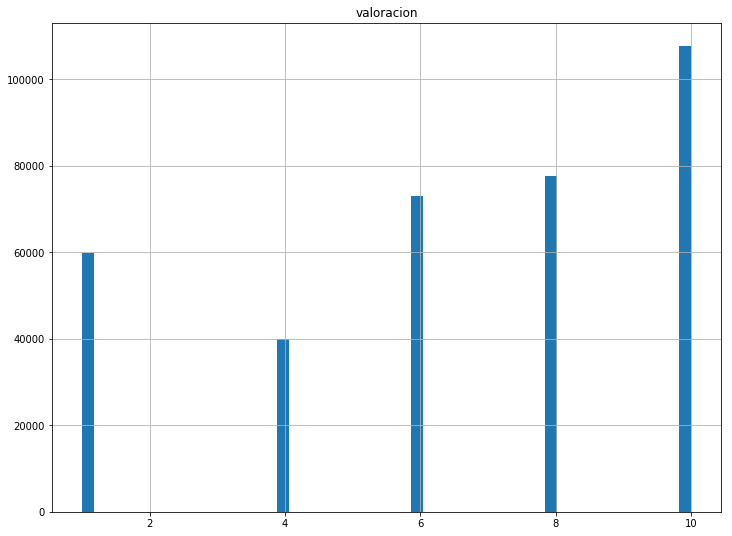

In [68]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12,9))
plt.show()

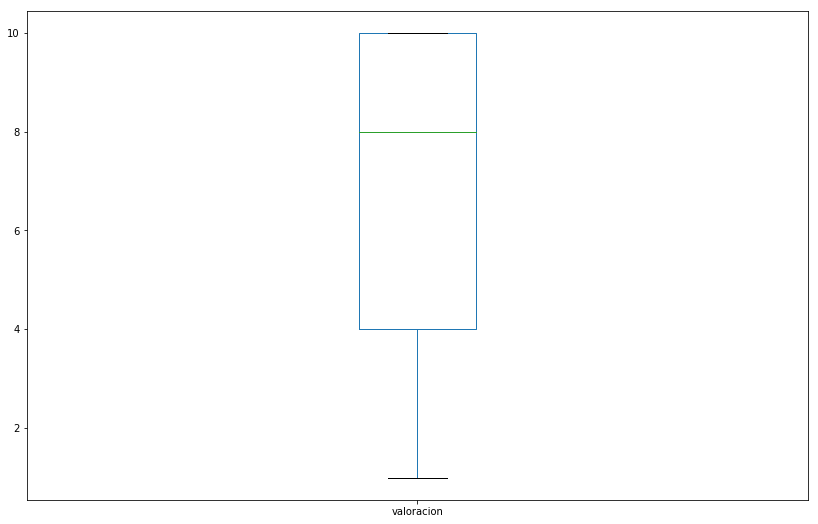

In [69]:
df.plot(kind="box", figsize=(14,9))

In [70]:
#Creamos una lista con los valores para la nueva variable valoracion positiva,negativa o neutra (basado en una categoriizacion de NPS)

nuevas_variables_valoracion = []

for fila in df["valoracion"]:
    if (fila >= 0 and fila <= 6):
        nuevas_variables_valoracion.append("negativa")
    elif (fila >= 7 and fila <= 8):        
        nuevas_variables_valoracion.append("neutra")
    else:
        nuevas_variables_valoracion.append("positiva")


In [71]:
len(nuevas_variables_valoracion)

358284

In [72]:
df["NuevaValoracion"] = nuevas_variables_valoracion

In [73]:
df.head()

,comentario,valoracion,NuevaValoracion
0,"Para chicas es perfecto, ya que la esfera no e...",8.0,neutra
1,Muy floja la cuerda y el anclaje es de mala ca...,1.0,negativa
2,"Razonablemente bien escrito, bien ambientado, ...",6.0,negativa
3,Hola! No suel o escribir muchas opiniones sobr...,10.0,positiva
4,A simple vista m parecia una buena camara pero...,1.0,negativa


In [74]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

lencoder.fit(df["NuevaValoracion"])

LabelEncoder()

In [75]:
df["clase"] = lencoder.transform(df["NuevaValoracion"])

In [76]:
df.head()

,comentario,valoracion,NuevaValoracion,clase
0,"Para chicas es perfecto, ya que la esfera no e...",8.0,neutra,1
1,Muy floja la cuerda y el anclaje es de mala ca...,1.0,negativa,0
2,"Razonablemente bien escrito, bien ambientado, ...",6.0,negativa,0
3,Hola! No suel o escribir muchas opiniones sobr...,10.0,positiva,2
4,A simple vista m parecia una buena camara pero...,1.0,negativa,0


In [77]:
#Me aseguro que no haya duplicados
df.drop_duplicates(inplace=True)

In [78]:
df.shape

(358284, 4)

In [79]:
#Dejamos solo las variables del dataframe necesarias

del df["valoracion"]
del df["NuevaValoracion"]

In [80]:
df.head()

,comentario,clase
0,"Para chicas es perfecto, ya que la esfera no e...",1
1,Muy floja la cuerda y el anclaje es de mala ca...,0
2,"Razonablemente bien escrito, bien ambientado, ...",0
3,Hola! No suel o escribir muchas opiniones sobr...,2
4,A simple vista m parecia una buena camara pero...,0


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# Hacemos el split de los datos en Train y Test:
train, test = train_test_split(df,
                               train_size=0.75,
                               test_size=0.25)

In [83]:
#Grid search para probar diferentes algoritmos y parametros y poder elegir el de mejor rendimiento

In [84]:
# Generamos nuestro tokenizer con NLTK:

from nltk.tokenize import RegexpTokenizer

nuestro_tokenizer = RegexpTokenizer("[\w']+")


# Stemmer...
from nltk.stem.snowball import SpanishStemmer

stemmer_castellano = SpanishStemmer()


# Función que hace la tokenization y stemming...
def nuestro_tokenizer_y_stemmer(documento):
    return [stemmer_castellano.stem(token) for token in nuestro_tokenizer.tokenize(documento)]


# Stopwords...
from nltk.corpus import stopwords

stopwords_castellano = stopwords.words("spanish")


# Hashing trick:
from sklearn.feature_extraction.text import HashingVectorizer

hashing_trick = HashingVectorizer()


# TF-IDF:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()


# Modelos:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

logreg = LogisticRegression()
adaboost = AdaBoostClassifier(base_estimator=LogisticRegression(solver="lbfgs"))
rf = RandomForestClassifier()
nb = MultinomialNB()
svm = LinearSVC()


# Pipelines:
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline(steps=[("hashing_trick", hashing_trick),
                              ("tfidf", tfidf_transformer),
                              ("logreg", logreg)])

pipeline_adaboost = Pipeline(steps=[("hashing_trick", hashing_trick),
                                    ("tfidf", tfidf_transformer),
                                    ("adaboost", adaboost)])

pipeline_rf = Pipeline(steps=[("hashing_trick", hashing_trick),
                              ("tfidf", tfidf_transformer),
                              ("rf", rf)])

pipeline_nb = Pipeline(steps=[("hashing_trick", hashing_trick),
                              ("tfidf", tfidf_transformer),
                              ("nb", nb)])

pipeline_svm = Pipeline(steps=[("hashing_trick", hashing_trick),
                               ("tfidf", tfidf_transformer),
                               ("svm", svm)])


# Grids de hiperparámetros:
param_grid_lr = {"hashing_trick__strip_accents": ["ascii"],
                 "hashing_trick__analyzer": ["word"],
                 "hashing_trick__stop_words": [stopwords_castellano],
                 "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer], 
                 "hashing_trick__lowercase": [True],
                 "hashing_trick__norm" : [None],
                 "hashing_trick__n_features": [2**22], # Distintas longitudes de vector
                 "hashing_trick__ngram_range": [(1,1), (1,2)], # solo monogramas (estándar),
                                                                      # monogramas y bigramas
                 "logreg__solver": ["lbfgs"]
                }

param_grid_adaboost = {"hashing_trick__strip_accents": ["ascii"],
                       "hashing_trick__analyzer": ["word"],
                       "hashing_trick__stop_words": [stopwords_castellano],
                       "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer],
                       "hashing_trick__lowercase": [True],
                       "hashing_trick__norm" : [None],
                       "hashing_trick__n_features": [2**22],
                       "hashing_trick__ngram_range": [(1,1), (1,2)],
                       "adaboost__n_estimators": [200]
                      }

param_grid_rf = {"hashing_trick__strip_accents": ["ascii"],
                 "hashing_trick__analyzer": ["word"],
                 "hashing_trick__stop_words": [stopwords_castellano],
                 "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer],
                 "hashing_trick__lowercase": [True],
                 "hashing_trick__norm" : [None],
                 "hashing_trick__n_features": [2**22],
                 "hashing_trick__ngram_range": [(1,1), (1,2)],
                 "rf__n_estimators": [100, 200],  
                 "rf__max_depth": [10,20],
                 "rf__min_samples_split": [5,10],
                 "rf__min_samples_leaf": [5]
                }

param_grid_nb = {"hashing_trick__strip_accents": ["ascii"],
                 "hashing_trick__analyzer": ["word"],
                 "hashing_trick__stop_words": [stopwords_castellano],
                 "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer],
                 "hashing_trick__lowercase": [True],
                 "hashing_trick__norm" : [None],
                 "hashing_trick__n_features": [2**20, 2**22],
                 "hashing_trick__ngram_range": [(1,1), (1,2)],
                 "hashing_trick__non_negative": [True], # Necesario para el Naïve Bayes
                 "tfidf__norm": [None], # Preferible para el Naïve Bayes (debería mejorar resultados)
                 "nb__alpha": [0.001, 0.5, 1.0]
                }

param_grid_svm = {"hashing_trick__strip_accents": ["ascii"],
                  "hashing_trick__analyzer": ["word"],
                  "hashing_trick__stop_words": [stopwords_castellano],
                  "hashing_trick__tokenizer": [nuestro_tokenizer_y_stemmer],
                  "hashing_trick__lowercase": [True],
                  "hashing_trick__norm" : [None],
                  "hashing_trick__n_features": [2**22],
                  "hashing_trick__ngram_range": [(1,1), (1,2)],
                  "tfidf__norm": [None, "l2"],
                  "svm__penalty": ["l1", "l2"],
                  "svm__dual": [False]
                }


# Instancias de Grid Search:
from sklearn.model_selection import GridSearchCV

gs_logreg = GridSearchCV(estimator=pipeline_lr,
                         param_grid=param_grid_lr,
                         scoring="accuracy",
                         cv=2,
                         n_jobs=1,
                         verbose=1)

gs_adaboost = GridSearchCV(estimator=pipeline_adaboost,
                           param_grid=param_grid_adaboost,
                           scoring="accuracy",
                           cv=2,
                           n_jobs=1,
                           verbose=1)

gs_rf = GridSearchCV(estimator=pipeline_rf,
                     param_grid=param_grid_rf,
                     scoring="accuracy",
                     cv=2,
                     n_jobs=1,
                     verbose=1)

gs_nb = GridSearchCV(estimator=pipeline_nb,
                     param_grid=param_grid_nb,
                     scoring="accuracy",
                     cv=2,
                     n_jobs=1,
                     verbose=1)

gs_svm = GridSearchCV(estimator=pipeline_svm,
                     param_grid=param_grid_svm,
                     scoring="accuracy",
                     cv=2,
                     n_jobs=1,
                     verbose=1)

# Los metemos todos en un diccionario:

bag_de_modelos = {"Logistic Regression": gs_logreg,
                  "Random Forests": gs_rf,
                  "Adaboost": gs_adaboost,
                  "Naive Bayes": gs_nb,
                  "SVM Lineal": gs_svm
                 }

In [85]:
for nombre, gs in bag_de_modelos.items():
    print("Haciendo Grid Search de la Pipeline de %s..." % nombre)
    gs.fit(X=train["comentario"], y=train["clase"])
    print("¡Grid Search de la Pipeline de %s realizada!" % nombre)

Haciendo Grid Search de la Pipeline de Logistic Regression...
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien'

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


¡Grid Search de la Pipeline de Logistic Regression realizada!
Haciendo Grid Search de la Pipeline de Random Forests...
Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien'

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tod', 'tuv', 'tuvier', 'tuvies', 'tuy', 'vosostr', 'vuestr'] not in stop_words

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tod', 'tuv', 'tuvier', 'tuvies', 'tuy', 'vosostr', 'vuestr'] not in stop_words

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tod', 'tuv', 'tuvier', 'tuvies', 'tuy', 'vosostr', 'vuestr'] not in stop_words

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 295.6min finished
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tod', '

¡Grid Search de la Pipeline de Random Forests realizada!
Haciendo Grid Search de la Pipeline de Adaboost...
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien'

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tod', 'tuv', 'tuvier', 'tuvies', 'tuy', 'vosostr', 'vuestr'] not in stop_words

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tod', 'tuv', 'tuvier', 'tuvies', 'tuy', 'vosostr', 'vuestr'] not in stop_words

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tod', 'tuv', 'tuvier', 'tuvies', 'tuy', 'vosostr', 'vuestr'] not in stop_words

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 222.8min finished
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien', 'tod', '

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-pa

¡Grid Search de la Pipeline de Adaboost realizada!
Haciendo Grid Search de la Pipeline de Naive Bayes...
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', '

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'e

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habr

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si',

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'e

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habr

¡Grid Search de la Pipeline de Naive Bayes realizada!
Haciendo Grid Search de la Pipeline de SVM Lineal...
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendreis', 'tendri', 'tendriais', 'teneis', 'teng', 'tengais', 'teni', 'teniais', 'tien'

¡Grid Search de la Pipeline de SVM Lineal realizada!


In [86]:
#cuál ha dado mejor ACCURACY en valizadión cruzada...

In [87]:
for nombre, pipeline in bag_de_modelos.items():
    print("Accuracy en CV de la mejor Pipeline de %s:\t%s" % (nombre, pipeline.best_score_))
    
mejor_pipeline = (None, float("-inf"))
for nombre, pipeline in bag_de_modelos.items():
    if pipeline.best_score_ > mejor_pipeline[1]:
        mejor_pipeline = (nombre, pipeline.best_score_)
        
print("\nLa mejor Pipeline es entonces %s, con ACCURACY de %s" % (mejor_pipeline[0], mejor_pipeline[1]))

Accuracy en CV de la mejor Pipeline de Logistic Regression:	0.6961107203596402
Accuracy en CV de la mejor Pipeline de Random Forests:	0.48193425699538167
Accuracy en CV de la mejor Pipeline de Adaboost:	0.4984611834931693
Accuracy en CV de la mejor Pipeline de Naive Bayes:	0.6199030192063651
Accuracy en CV de la mejor Pipeline de SVM Lineal:	0.6920469050622784

La mejor Pipeline es entonces Logistic Regression, con ACCURACY de 0.6961107203596402


In [88]:
# Vamos a re-entrenar el mejor modelo ganador con todo el conjunto de train (sin validación, para entrenar con la mayor cantidad de datos posibles)

In [89]:
pipeline_elegida = bag_de_modelos[mejor_pipeline[0]].best_estimator_

In [90]:
pipeline_elegida.fit(X=train["comentario"], y=train["clase"])

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('hashing_trick', HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=4194304, ngram_range=(1, 2), non_negative=False,
         norm...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [92]:
#Sacamos precision, recall, f1-score y accuracy en el conjunto de test:

In [93]:
from sklearn.metrics import classification_report

reporte_clasif = classification_report(y_true = test["clase"],
                                       y_pred = pipeline_elegida.predict(X=test["comentario"])
                                      )

print("Métricas de rendimiento en el conjunto de test:")
print(reporte_clasif)

Métricas de rendimiento en el conjunto de test:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82     43322
           1       0.51      0.22      0.31     19314
           2       0.67      0.73      0.70     26935

   micro avg       0.70      0.70      0.70     89571
   macro avg       0.65      0.62      0.61     89571
weighted avg       0.68      0.70      0.67     89571



In [94]:
from sklearn.metrics import accuracy_score

accur = accuracy_score(y_true = test["clase"],
                       y_pred = pipeline_elegida.predict(X=test["comentario"])
                      )
print("Accuracy en el conjunto de test: %s" % accur)

Accuracy en el conjunto de test: 0.7047481885878242


In [98]:
pipeline_elegida.steps

[('hashing_trick',
  HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
           decode_error='strict', dtype=<class 'numpy.float64'>,
           encoding='utf-8', input='content', lowercase=True,
           n_features=4194304, ngram_range=(1, 2), non_negative=False,
           norm=None, preprocessor=None,
           stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde'...tuviésemos', 'tuvieseis', 'tuviesen', 'teniendo', 'tenido', 'tenida', 'tenidos', 'tenidas', 'tened'],
           strip_accents='ascii', token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function nuestro_tokenizer_y_stemmer at 0x000002ABB03AA158>)),
 ('tfidf',
  TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
 ('log